
### Missing Values- Feature Engineering- Day 1

#### Lifecycle of a Data Science Projects

    Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
    Feature Engineering---Handling Missing Values

Why are their Missing values?? Survey--Depression Survey

    They hesitate to put down the information
    Survey informations are not that valid
    Men--salary
    Women---age
    People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources
What are the different types of Missing Data?

#### Missing Completely at Random, MCAR: A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


##### Missing Data Not At Random(MNAR): Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [9]:
import numpy as np
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)
df['cabin_null'].mean()

0.7710437710437711

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [14]:
df.groupby(by ='Survived')['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

#### Missing At Random(MAR)

Men---hide their salary
Women---hide their age

#### All the techniques of handling ,missing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation


#### Mean/ Median /Mode imputation

When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables


In [16]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [20]:
#we can see that age column have missing values
#we will try to handle those missing value by replacing this with median of the age group

In [21]:
def medianAge(df,variable,median):
    df[variable+"_New"]=df[variable].fillna(median)

In [25]:
median = df['Age'].median()
median

28.0

In [26]:
#now we got our median now we will pass this to our data set
medianAge(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_Age
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [28]:
print(df['Age'].std())
print(df['Age_Age'].std())


14.526497332334044
13.019696550973194


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

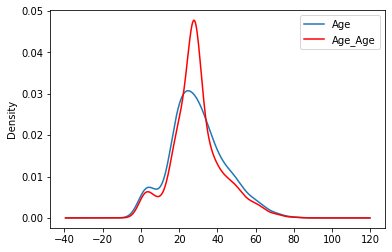

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_Age.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')